**Column Details:**
* **review:** Contains the description of the review.
* **ratings:** Contains the rating of the review(1-5)

In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
df = pd.read_csv("/content/flipkart_data.csv")
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [3]:
df.shape

(9976, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [5]:
df.describe()

,rating
count,9976.000000
mean,4.215417
std,1.167911
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [6]:
df['rating'].unique()

array([5, 4, 1, 3, 2])

There is no inconsistency in the ratig columns.

In [7]:
# Let's check for any null values
df.isnull().sum()

,0
review,0
rating,0


Luckily no null values.

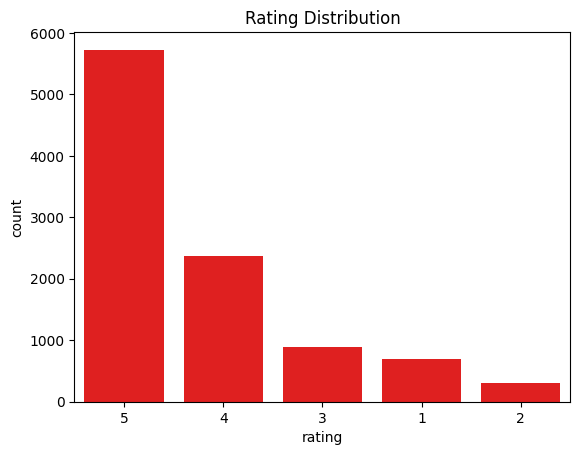

In [20]:
# Let's check the distribution of the rating attribute
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, color='red')
plt.title("Rating Distribution")
plt.show()

For this example we are considering all the ratings equal or above 5 as positive review and others as negative review.

In [22]:
# Defining label column
df['label'] = df['rating'].apply(lambda x: x>=5, 1, 0)

In [24]:
df['label'].value_counts()

,count
label,
True,5726
False,4250


Preprocess the review description.

In [29]:
# Preprocess the data
def preprocess(sentence):

    # Remove punchuation marks
    sentence = re.sub(r'[^\w\s]', '', sentence)

    # Remove Stop words

    return sentence
df['review'] = df['review'].apply(preprocess)
df['review']

,review
0,It was nice produt I like its design a lot It...
1,awesome soundvery pretty to see this nd the so...
2,awesome sound quality pros 78 hrs of battery l...
3,I think it is such a good product not only as ...
4,awesome bass sound quality very good bettary l...
...,...
9971,GoodREAD MORE
9972,Everything is amazimg but the built is very li...
9973,GoodREAD MORE
9974,Best headphone i have ever usedREAD MORE


In [25]:
df.columns

Index(['review', 'rating', 'label'], dtype='object')